In [3]:
import matplotlib.pyplot as plt
from pymaverick import spline
from pymaverick import solver as slv
import pandas as pd

In [4]:
model_parameters = {
    'g' : 9.81,
    'm' : 1200,
    'DX' : 1,
    'DY' : 1.3,
    'Klambda' : 10,
    'Fx_max' : 4,
    'Omega_max' : 1,
    'beta' : 0,
    'road_width' : 5,
    'w_reg' : 00.0,
    'w_diff_reg' : 0.6,

    'V0' : 7,
    'Vf' : 7,
    'Vmax' : 60,
    'Pmax' : 400*1000,
    'Pmin' : 400*1000*10,
    'Emin' : 10 * 1000000,
    'Emax' : 5 * 1000000,
    'max_power' : 1000,
    'min_power' : 0,
    'v_guess' : 20,
}

In [6]:
road_data = pd.read_csv('data/Adria2D.csv')

In [15]:
mapped_objects = {
    'RoadCurvature' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['kappa'].values,
    },
    'RoadX' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['x'].values,
    },
    'RoadY' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['y'].values,
    },
    'RoadXR' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['xR'].values,
    },
    'RoadYR' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['yR'].values,
    },
    'RoadXL' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['xL'].values,
    },
    'RoadYL' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['yL'].values,
    },
    'RoadHeading' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['psi'].values,
    },
    'RoadRightWidth' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['rightWidth'].values,
    },
    'RoadLeftWidth' : {
        'type' : '1arg_spline',
        'spline_type' : 'Akima',
        'x' : road_data['zeta'].values,
        'y' : road_data['leftWidth'].values,
    },
    'RegularizedPositive' : {
        'type' : '1arg_reg_pos_sqrt',
        'epsilon' : 0.01,
    },
}

In [21]:
solver_data = {
    'info_level' : 4,

    'Model' : {

        'Parameters' : model_parameters,

        'MappedObjects' : mapped_objects,

        'Scaling' : {
            'Phase0' : {
                'target' : 100,
                'states_and_controls' : 'automatic-bounds', # n, alpha, V, lambda, ux, uy
                'parameters' : 'automatic-bounds',
                'fo_equations' : [1, 1, model_parameters['Fx_max'] * model_parameters['g'], 1 ],
                'path_constraints' : 'automatic-bounds',
                'integral_constraints' : 'automatic-bounds',
                'boundary_conditions' : [1, 1, model_parameters['V0'], 1, model_parameters['V0']],
            },
        },
    },

    'Mesh' : {
        'max_iterations' : 10,
        'tolerance' : 1e-4,
        'Phase0' : {
            'Segments' : [ {'length' : road_data['zeta'].values[-1], 'num_points' : 300} ],
        },
    },

    'Solver' : {
        'nlp_solver' : 'Ipopt',
        'IpoptOptions' : {
            'linear_solver' : 'ma27',
            'ma57_automatic_scaling' : 'yes',
            'mu_strategy' : 'adaptive',
            'check_derivatives_for_naninf' : 'yes',
        },
    },
}

In [13]:
solver = slv.Solver('./sources/libSingleMassPointE.so')

In [22]:
output = solver.solve(solver_data)
sol = output['solution']['Phase0']


Computation time: 0.783908s
Mesh error is NOT satisfied in current mesh (iteration 0) : 2.126709e-02 (threshold = 1.000000e-03)

Total time elapsed:                0.817s
Total calculation time:            783.000ms
Total iterations:                  158
Target:                            8.903e+01

************************************************************************
*                                                                      *
*          Maverick, a software for optimal control problems           *
*                                                                      *
*                                                                      *
*     Developed by Nicola Dal Bianco - nicola.dalbianco@gmail.com      *
*                                                                      *
************************************************************************

Setting up ocp problem ...
OCP model parameters detail:
          g    9.810000e+00
          m    1.200000e+03
 

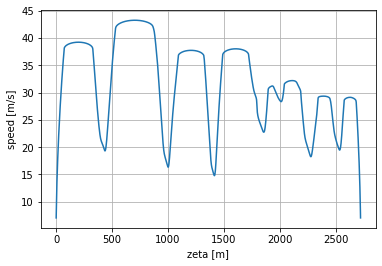

In [24]:
plt.figure()
plt.plot(sol['zeta'],sol['V']);
plt.xlabel('zeta [m]')
plt.ylabel('speed [m/s]')
plt.grid(True)

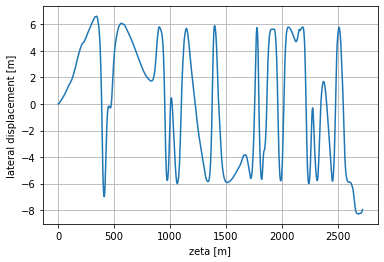

In [25]:
plt.figure()
plt.plot(sol['zeta'],sol['n'])
plt.xlabel('zeta [m]')
plt.ylabel('lateral displacement [m]')
plt.grid(True)